# ILSVRC 2012 Dataset Exploration

List classes, sample random images and images from axolotl class

In [1]:
import multiprocessing
from typing import List

import torch

print(f'Batch size = # CPUs available = {multiprocessing.cpu_count()}')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
SEED: int = 0
BATCH_SIZE: int = multiprocessing.cpu_count()
NUMBER_OF_BATCHES: int = 1

ROOT: str = '~/Documents/personal/unterlagen/bildung/uni/master/masterarbeit/code/lrp/data'
CLASSES: List[str] = ['axolotl']

Batch size = # CPUs available = 10


## Sample Random Images

In [ ]:
import lrp.plot
from data_loader.core import imagenet_data_loader

my_dataloader = imagenet_data_loader(root=ROOT, batch_size=BATCH_SIZE, seed=2)

dataloader_iter = iter(my_dataloader)

# Select first batch from the data loader.
one_ten_input_nchw = next(dataloader_iter)[0].to(device)
two_ten_input_nchw = next(dataloader_iter)[0].to(device)
three_five_input_nchw = next(dataloader_iter)[0].to(device)[:5]

input_nchw: torch.Tensor = torch.cat((one_ten_input_nchw,
          two_ten_input_nchw,
          three_five_input_nchw))
lrp.plot.grid_plot_imagenet(img_nchw_rgb=input_nchw, nrow=5)

## Sample Axolotl Images

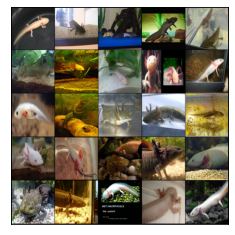

In [2]:
import lrp.plot
from data_loader.core import imagenet_data_loader

my_dataloader = imagenet_data_loader(root=ROOT, batch_size=BATCH_SIZE, classes=CLASSES, seed=2)

dataloader_iter = iter(my_dataloader)

# Select first batch from the data loader.
one_ten_input_nchw = next(dataloader_iter)[0].to(device)
two_ten_input_nchw = next(dataloader_iter)[0].to(device)
three_five_input_nchw = next(dataloader_iter)[0].to(device)[:5]

input_nchw: torch.Tensor = torch.cat((one_ten_input_nchw,
          two_ten_input_nchw,
          three_five_input_nchw))
lrp.plot.grid_plot_imagenet(img_nchw_rgb=input_nchw, nrow=5)

## List Image Classes

In [ ]:
my_dataloader: torch.utils.data.DataLoader = imagenet_data_loader(root=ROOT,
                                                                  batch_size=1,
                                                                  seed=0)

dataset = my_dataloader.dataset

dataset_size = len(dataset)
classes = dataset.classes
num_classes = len(dataset.classes)
img_dict = {}
for i in range(num_classes):
    img_dict[classes[i]] = 0

for i in range(dataset_size):
    img, label = dataset[i]
    img_dict[classes[label]] += 1

img_dict